# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re

### Read File

In [2]:
apps = pd.read_csv('https://raw.githubusercontent.com/truongvihuy/Week4Assignment/master/google-play-store.csv')

In [3]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [4]:
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### The cleaning and exploration of data
#### App

In [6]:
apps['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

#### Category

In [7]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
apps[apps['Category'] == '1.9']
# This line is error

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
apps = apps[~(apps['Category'] == '1.9')]

#### Rating

In [10]:
apps[apps['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


Text(0, 0.5, 'Frequency')

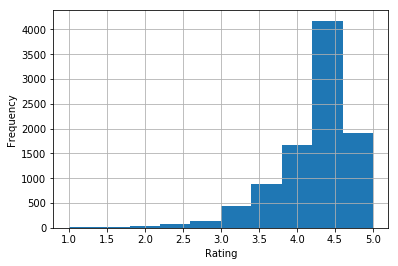

In [11]:
apps['Rating'].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Reviews

In [12]:
temp = apps['Reviews'].unique()
temp.sort()
temp

array(['0', '1', '10', ..., '9975', '999', '9992'], dtype=object)

Text(0, 0.5, 'Frequency')

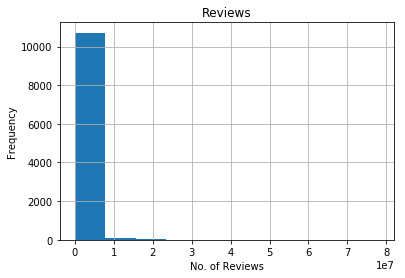

In [13]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'])
apps.hist(column='Reviews')
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

#### Size

In [14]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
apps['Size'] = apps['Size'].str.replace('k','e+3')
apps['Size'] = apps['Size'].str.replace('M','e+6')
apps['Size'] = apps['Size'].str.replace('Varies with device','')
apps['Size']= apps['Size'].replace('Varies with device',np.nan)

Text(0, 0.5, 'Frequency')

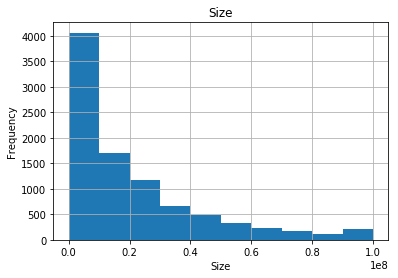

In [16]:
apps['Size'] = pd.to_numeric(apps['Size'])
apps.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

#### Installs

In [17]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
apps['Installs'] = apps['Installs'].apply(lambda x: x.strip('+'))
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(',',''))
apps['Installs'] = pd.to_numeric(apps['Installs'])

Text(0, 0.5, 'Frequency')

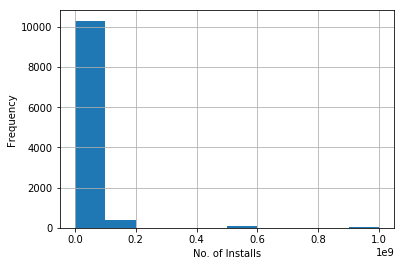

In [19]:
apps['Installs'].hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

#### Type

In [20]:
apps[apps['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [21]:
apps['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [22]:
apps['Type'] = apps['Price'].apply(lambda money: "Free" if money == '0' else "Paid")

In [23]:
apps['Type'].isna().sum()

0

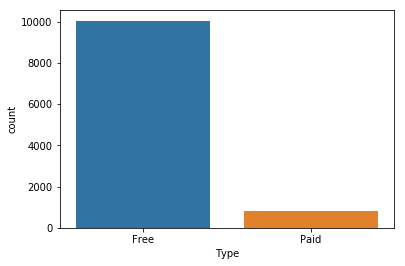

In [24]:
sns.countplot(x='Type',data=apps)

#### Price

In [25]:
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
apps['Price'] = apps['Price'].apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Frequency')

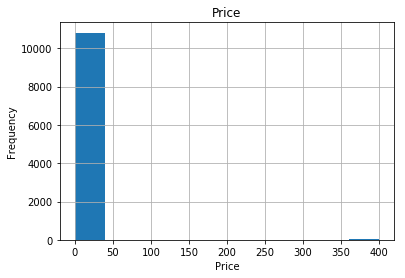

In [27]:
apps['Price'] = pd.to_numeric(apps['Price'])
apps.hist(column='Price');
plt.xlabel('Price')
plt.ylabel('Frequency')

#### Content Rating

In [28]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

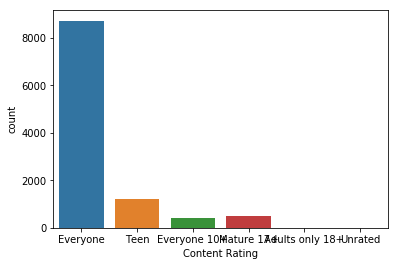

In [29]:
sns.countplot(x='Content Rating',data=apps)

#### Genres

In [30]:
print()
apps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#### Last Updated

In [31]:
apps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [32]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

In [33]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


#### Current Version

In [34]:
apps[apps['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222000.0,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7200000.0,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237000.0,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658000.0,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


In [35]:
apps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [36]:
apps['Current Ver'].fillna(value='Varies with device', inplace=True)

In [37]:
apps['Current Ver'].value_counts()

Varies with device                   1467
1.0                                   809
1.1                                   264
1.2                                   178
2.0                                   151
1.3                                   145
1.0.0                                 136
1.0.1                                 119
1.4                                    88
1.5                                    81
1.0.2                                  80
1.6                                    65
1.0.3                                  62
2.1                                    61
3.0                                    59
1.0.4                                  58
1.7                                    53
2.0.0                                  51
1.0.5                                  50
1.1.0                                  49
1.1.1                                  48
1.0.6                                  47
1.2.1                                  46
1.2.0                             

In [38]:
apps['Current Ver'] = apps['Current Ver'].apply(lambda x: 'Varies with device' if x == 'Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])

In [39]:
apps['Current Ver'].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

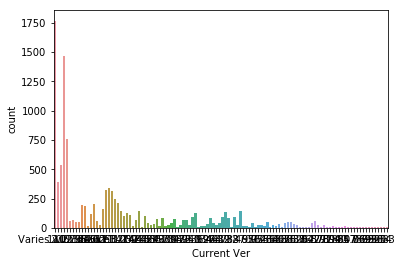

In [40]:
sns.countplot(x='Current Ver',data=apps)

#### Android version

In [41]:
apps[apps['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000000.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100000.0,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [42]:
apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [43]:
apps['Version Begin'] = apps['Android Ver'].apply(lambda x: str(x).split(' and ')[0].split(' - ')[0])
apps['Version End'] = apps['Android Ver'].apply(lambda x: str(x).split(' and ')[-1].split(' - ')[-1])

In [44]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Version Begin,Version End
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0.3 and up,4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0.3 and up,4.0.3,up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0.3 and up,4.0.3,up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.2,up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.4,up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,2.3,up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up,4.0.3,up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1,4.2 and up,4.2,up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9,3.0 and up,3.0,up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,4.0.3,up
